In [9]:
import pandas as pd

def load_housing_data(path):
    df = pd.read_csv(path)
    return df

housing = load_housing_data('./data/train.csv')

In [10]:
train_set_full = housing.copy()

### BEGIN DATA EXLPORATION

numerical_data = housing.select_dtypes(include=['float64', 'int64'])

categorical_data = housing.select_dtypes(include=['object'])


In [11]:
# get corr matrix of full train set
corr_matrix = train_set_full.corr()
# print "sale price" values of corr matrix, sorted from top to bottom
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GarageCars'>],
       [<AxesSubplot:xlabel='OverallQual', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageAr

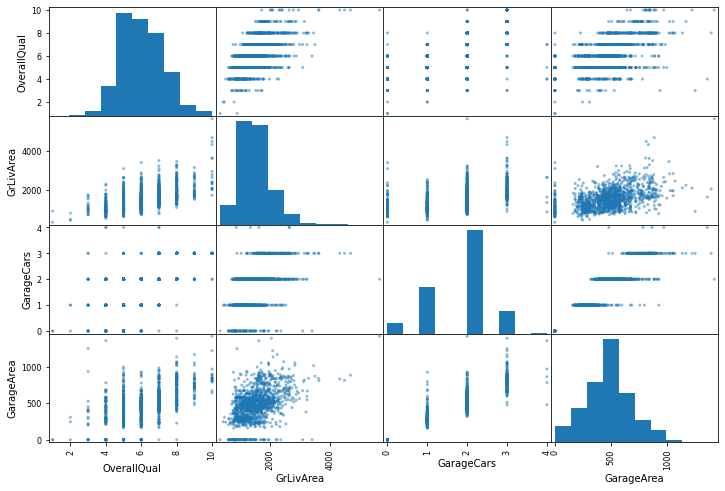

In [12]:
from pandas.plotting import scatter_matrix

# OverallQual      0.790982
# GrLivArea        0.708624
# GarageCars       0.640409
# GarageArea       0.623431
attributes = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
scatter_matrix(train_set_full[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

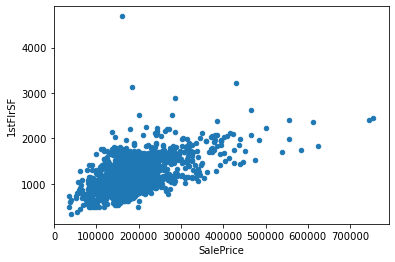

In [13]:
train_set_full.plot(kind="scatter", x="SalePrice", y="1stFlrSF")


In [14]:
# Features to be used
# OverallQual      0.790982
# GrLivArea        0.708624
# GarageCars       0.640409
# GarageArea       0.623431
# TotalBsmtSF      0.613581
# 1stFlrSF         0.605852

train_set_full = housing.copy()
# seperate the labels from housing
train_set_labels = train_set_full['SalePrice']
# remove labels from data
train_set = train_set_full[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']]
# train_set = train_set_full.drop('SalePrice', axis=1)




In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   1stFlrSF     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [16]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('preprocessor', MinMaxScaler()),
])

train_set_scaled = pipeline.fit_transform(train_set)

In [17]:
train_set_scaled

array([[0.66666667, 0.25923135, 0.5       , 0.1400982 , 0.11977972],
       [0.55555556, 0.17483044, 0.5       , 0.20654664, 0.21294172],
       [0.66666667, 0.27354936, 0.5       , 0.15057283, 0.13446535],
       ...,
       [0.66666667, 0.37792012, 0.25      , 0.18854337, 0.19596145],
       [0.44444444, 0.14016579, 0.25      , 0.17643208, 0.17072051],
       [0.44444444, 0.17370008, 0.25      , 0.20556465, 0.21156494]])

In [18]:
# create random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(train_set_scaled, train_set_labels)

In [19]:
# create a param grid for the random forest regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [20]:
# create a grid seach for the best parameters of the model
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=True)
grid_search.fit(train_set_scaled, train_set_labels)
model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 4/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 1/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV 2/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV 3/5] END max_depth=3, max_features=auto, min_samples_leaf=1, min_sample

In [21]:
grid_search.best_params_


{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [22]:
# find mean squared error
test_data = train_set_scaled[:5].copy()
test_labels = train_set_labels.iloc[:5]
model.predict(test_data)

array([193059.83894622, 172875.52555849, 207650.65639042, 184822.91650092,
       284587.79970798])

In [23]:
print(test_labels)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [24]:
from sklearn.metrics import mean_squared_log_error

predictions = model.predict(train_set_scaled)
msle = mean_squared_log_error(train_set_labels, predictions)

In [25]:
import numpy as np
rmsle = np.sqrt(msle)

In [26]:
rmsle

0.12316148310650722

In [27]:
# cross validate the model
import sklearn
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_set_scaled, train_set_labels,
                         scoring="neg_mean_squared_log_error", cv=5)
rmse_scores = np.sqrt(-scores)

In [28]:
rmse_scores

array([0.16607936, 0.1825334 , 0.17176404, 0.16065506, 0.17050455])

In [29]:
scores.mean()

-0.02905710615169249

In [30]:
rmse_scores.mean()

0.17030728183788832

In [33]:
# TEST RESULTS

test_set = pd.read_csv("./data/test.csv")
test_set = test_set[['OverallQual', 'GrLivArea',
                            'GarageCars', 'TotalBsmtSF', '1stFlrSF']]



In [36]:
test_set.fillna(0, inplace=True)

In [37]:
test_set_prepared = pipeline.fit_transform(test_set)

predictions = model.predict(test_set_prepared)
print(predictions)


[121167.46233742 161296.39924763 148986.68864922 ... 163614.2675232
 115921.39041678 244484.06627726]


In [43]:
with open('data/submission.csv', 'w') as f:
    f.write('Id,SalePrice\n')
    for i in range(len(predictions)):
        f.write('{0},{1}\n'.format(i + 1461, predictions[i]))
        
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']